In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are no missing values in the given dataset.

In [4]:
print('Unique values in each column:')
for col in df.columns:
    print(f'\t{col} = {len(df[col].unique())}')

Unique values in each column:
	age = 41
	sex = 2
	cp = 4
	trestbps = 49
	chol = 152
	fbs = 2
	restecg = 3
	thalach = 91
	exang = 2
	oldpeak = 40
	slope = 3
	ca = 5
	thal = 4
	target = 2


There are no leaking feature and all theatures are numericals. Thus, there is no need for label encoding or Onrhot encoding

In [6]:
X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Classifier and Tree Plot

Decision Tree Classifier Accuracy: 0.8439024390243902
Confusion Matrix:
 [[75 27]
 [ 5 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



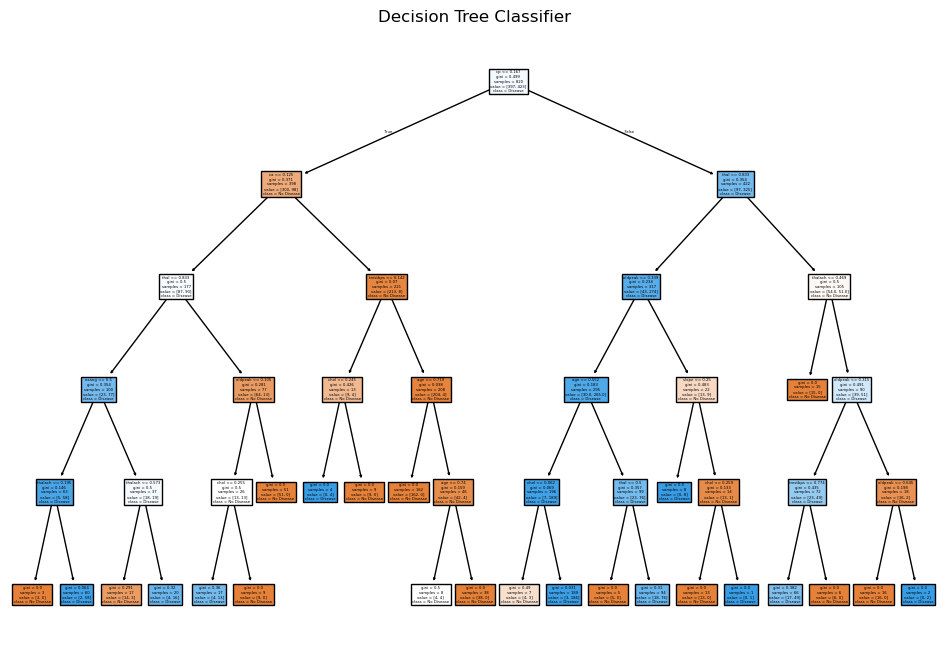

In [24]:
# Fitting the Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(X_train, y_train)

# Evaluating the Decision Tree Classifier
y_pred = DT.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the Decision Tree

plt.figure(figsize=(12, 8))
plot_tree(DT, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title('Decision Tree Classifier')
plt.show()

The accuracy of the model using 5 depth is 84%. So, we tune the depth parameter to find the best estimator.

## Hyperparameter Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.975609756097561
Best Parameters: {'max_depth': 10}
Best Decision Tree Classifier Accuracy: 0.9853658536585366


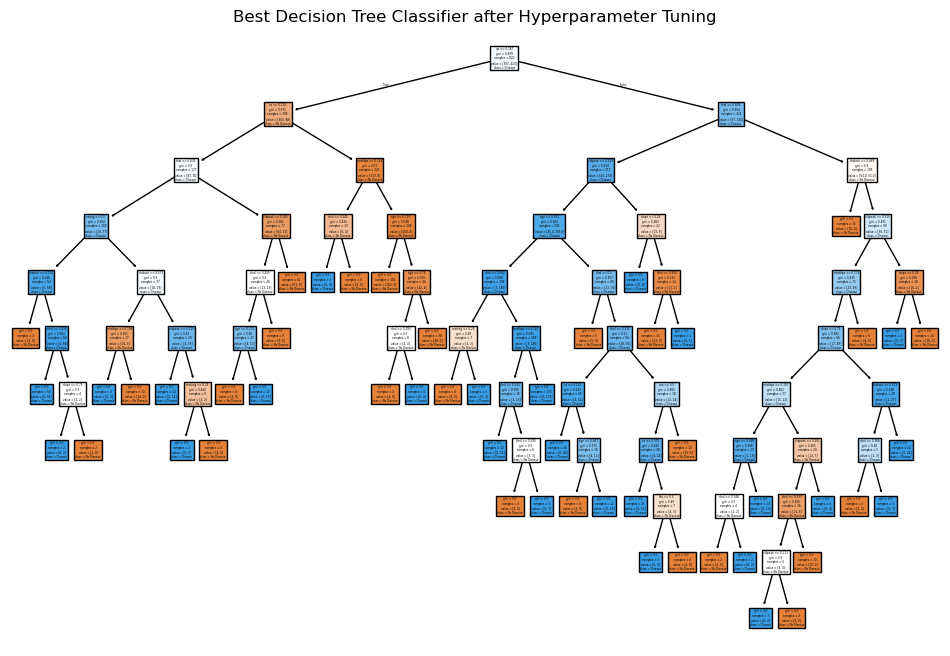

In [23]:
# Hyperparameter Tuning using GridSearchCV
grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

GS = GridSearchCV(estimator=DT, param_grid=grid, cv=5, n_jobs=-1, verbose=1)
GS.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Score:", GS.best_score_)
print("Best Parameters:", GS.best_params_)
best_DT = GS.best_estimator_
y_pred_best = best_DT.predict(X_test)

# Evaluating the best Decision Tree Classifier
print("Best Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_best))
plt.figure(figsize=(12, 8))
plot_tree(best_DT, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title('Best Decision Tree Classifier after Hyperparameter Tuning')
plt.show()

# Random Forest Classifier

In [22]:
# Fitting and Evaluating Random Forest Classifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_RF))



Random Forest Classifier Accuracy: 0.9853658536585366


The accuracy of the model is 98% after Hyperparamer Tuning of Decision Tree Classifier and Random Forest Classifier

## Feature Importances 

     Feature  Importance
0         cp    0.135072
1         ca    0.127327
2    thalach    0.122169
3    oldpeak    0.121905
4       thal    0.110518
5        age    0.077908
6       chol    0.074822
7   trestbps    0.071171
8      exang    0.057594
9      slope    0.045782
10       sex    0.028731
11   restecg    0.018557
12       fbs    0.008444


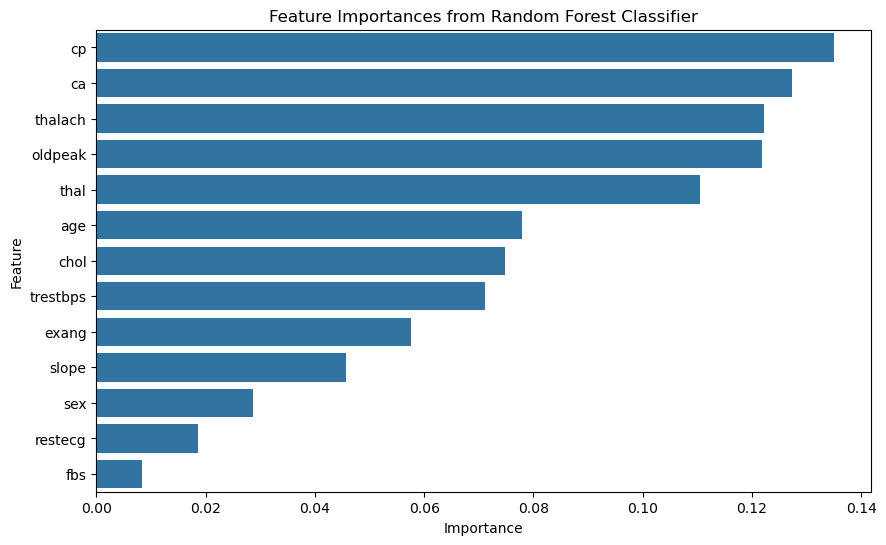

In [28]:
feature_importances = RF.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Cross Validation

In [29]:
cross_val_scores = cross_val_score(RF, X_scaled, y, cv=5)
print("Cross Validation Scores:", cross_val_scores)
print("Mean Cross Validation Score:", np.mean(cross_val_scores))

Cross Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Cross Validation Score: 0.9970731707317073
